<a href="https://colab.research.google.com/github/Rickmwasofficial/Food-Vision-Mini/blob/main/Food101_Tensorflow_Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Rickmwasofficial/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-25 11:20:42--  https://raw.githubusercontent.com/Rickmwasofficial/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-25 11:20:42 (80.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [22]:
from helper_functions import unzip_data, make_confusion_matrix, walk_through_dir, plot_loss_curves, create_tensorboard_callback, compare_historys

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data('101_food_classes_10_percent.zip')

--2024-08-25 11:20:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  21.7MB/s    in 71s     

2024-08-25 11:22:03 (21.7 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [4]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/guacamole'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pork_chop'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/beet_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/bibimbap'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/deviled_eggs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_onion_soup'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cannoli'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_carbonara'.
There are 0 directories and 75 imag

### Visualizing the data

In [5]:
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def visualize_image(filename, name):
  img = mpimg.imread(filename)
  plt.imshow(img)
  plt.title(name)
  plt.axis('off')


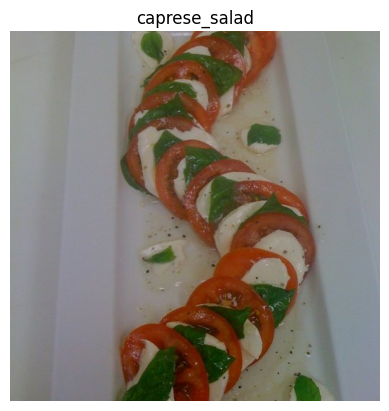

In [34]:
path = '101_food_classes_10_percent/train'
name = random.choice(os.listdir(path))
img = os.path.join(path, name, random.choice(os.listdir(os.path.join(path, name))))
visualize_image(img, name)

In [7]:
### Create testing and training data
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import numpy as np
import pandas as pd

train_dir = '/content/101_food_classes_10_percent/train'
test_dir = '/content/101_food_classes_10_percent/test'
train_data = image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    image_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

test_data = image_dataset_from_directory(
    test_dir,
    label_mode = 'categorical',
    image_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [14]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers

base_model = EfficientNetV2B2(
    input_shape = (224, 224, 3),
    include_top = False
)

# freeze the backbone
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='gap_layer')(x)

outputs = layers.Dense(len(train_data.class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b2 (Functional)       │ (None, 7, 7, 1408)          │       8,769,374 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap_layer (GlobalAveragePooling2D)   │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         142,309 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,911,683 (34.00 MB)

 Trainable params: 142,309 (555.89 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [15]:
hist_1 = model.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    callbacks = [create_tensorboard_callback(dir_name='food101', experiment_name='Not_fine_tuned')]
)

Saving TensorBoard log files to: food101/Not_fine_tuned/20240825-115120
Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 104s 269ms/step - accuracy: 0.1941 - loss: 3.7870 - val_accuracy: 0.5184 - val_loss: 2.1184
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 88s 138ms/step - accuracy: 0.5336 - loss: 2.0332 - val_accuracy: 0.5712 - val_loss: 1.7431
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 145ms/step - accuracy: 0.6150 - loss: 1.6130 - val_accuracy: 0.6004 - val_loss: 1.5753
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 149ms/step - accuracy: 0.6612 - loss: 1.4092 - val_accuracy: 0.6171 - val_loss: 1.4794
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 130ms/step - accuracy: 0.7005 - loss: 1.2463 - val_accuracy: 0.5294 - val_loss: 1.4445


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


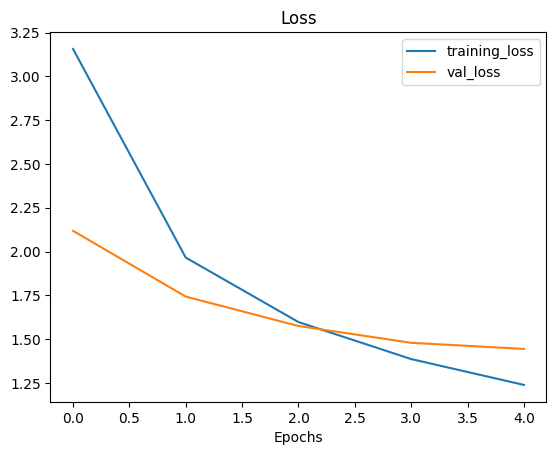

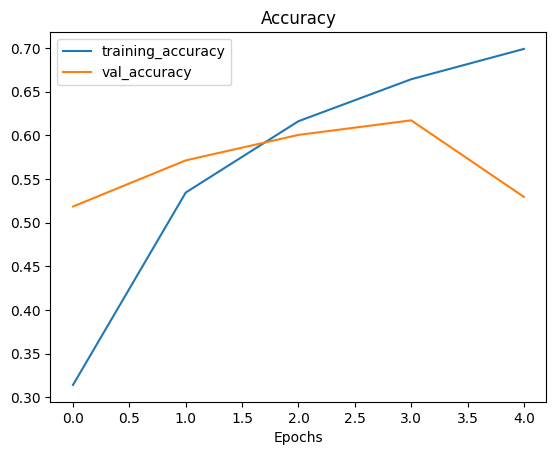

In [20]:
plot_loss_curves(hist_1)

In [21]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.0067 - loss: 4.6975


[4.6948676109313965, 0.007485148496925831]

## seems like the model is overfitting on the data, so we will try and implement data augmentation and and fine tune the model

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2)
])

In [16]:
base_model = EfficientNetV2B2(
    include_top = False,
    input_shape = (224, 224, 3)
)

base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name='input_layer')

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name='gap_layer')(x)

outputs = layers.Dense(len(train_data.class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b2 (Functional)       │ (None, None, None, 1408)    │       8,769,374 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap_layer (GlobalAveragePooling2D)   │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         142,309 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,911,683 (34.00 MB)

 Trainable params: 829,081 (3.16 MB)

 Non-trainable params: 8,082,602 (30.83 MB)

In [18]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
sequential True
efficientnetv2-b2 True
gap_layer True
output_layer True


In [19]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_layer_2 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv F

In [28]:
hist_2 = model.fit(
    train_data,
    epochs = 10,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    initial_epoch = len(hist_1.history['loss'])- 1,
    callbacks = [create_tensorboard_callback(dir_name='food101', experiment_name='fine_tuned_augmented')]
)

Saving TensorBoard log files to: food101/fine_tuned_augmented/20240825-120526
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 122s 511ms/step - accuracy: 0.3560 - loss: 3.0105 - val_accuracy: 0.5631 - val_loss: 1.6408
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 110s 465ms/step - accuracy: 0.5206 - loss: 1.9352 - val_accuracy: 0.5944 - val_loss: 1.4946
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 96s 405ms/step - accuracy: 0.5836 - loss: 1.6194 - val_accuracy: 0.6320 - val_loss: 1.3460
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 134s 372ms/step - accuracy: 0.6184 - loss: 1.4386 - val_accuracy: 0.6366 - val_loss: 1.3363
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 122s 287ms/step - accuracy: 0.6628 - loss: 1.2894 - val_accuracy: 0.7353 - val_loss: 1.1660
Epoch 10/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


237/237 ━━━━━━━━━━━━━━━━━━━━ 79s 332ms/step - accuracy: 0.7009 - loss: 1.1327 - val_accuracy: 0.6464 - val_loss: 1.3123


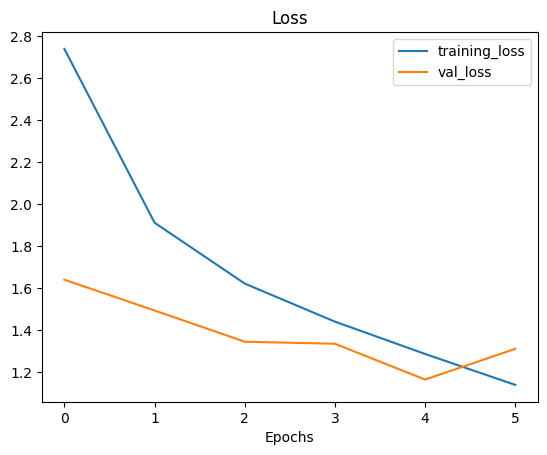

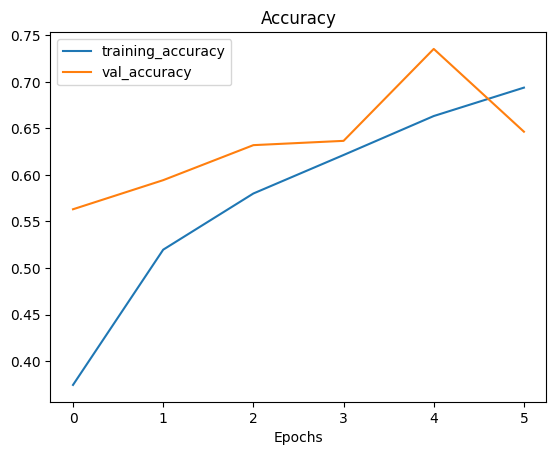

In [30]:
plot_loss_curves(hist_2)

In [31]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 66s 83ms/step - accuracy: 0.6429 - loss: 1.3253


[1.3183311223983765, 0.6432079076766968]

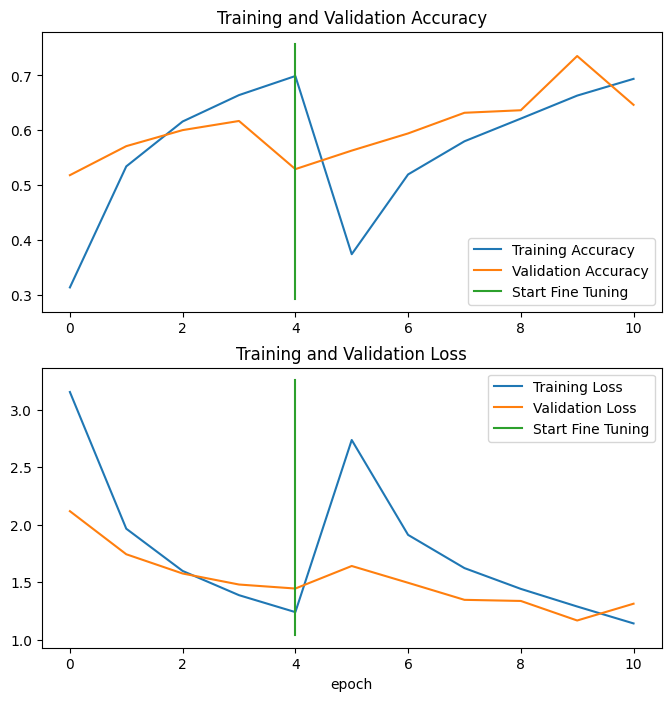

In [32]:
compare_historys(hist_1, hist_2)

In [44]:
def make_prediction(filename, name=None, model=model, img_shape=224, class_names=test_data.class_names):
    img = tf.io.read_file(filename)

    # Decode the image into a tensor
    img = tf.image.decode_image(img, channels=3)  # Ensure 3 channels (RGB)

    # Resize the image to the expected input shape
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image to [0, 1]
    img_1 = img / 255.0

    # Expand dimensions to fit model input
    img = tf.expand_dims(img, axis=0)

    # Make prediction
    preds = model.predict(img, verbose=0)

    # Print predictions for debugging
    # print("Predictions:", preds)

    # Get the class index with the highest probability
    predicted_class_index = tf.argmax(preds[0])

    # Map the class index to class name
    if class_names is not None:
        value = class_names[predicted_class_index]
    else:
        value = predicted_class_index.numpy()

    plt.imshow(img_1)
    plt.axis(False)

    if name == value:
      plt.title(f'Predicted: {value} \n True: {name} \n Probability: {np.max(preds[0]):.2f}', c='g')
    else:
      plt.title(f'Predicted: {value} \n True: {name} \n Probability: {np.max(preds[0]):.2f}', c='r')


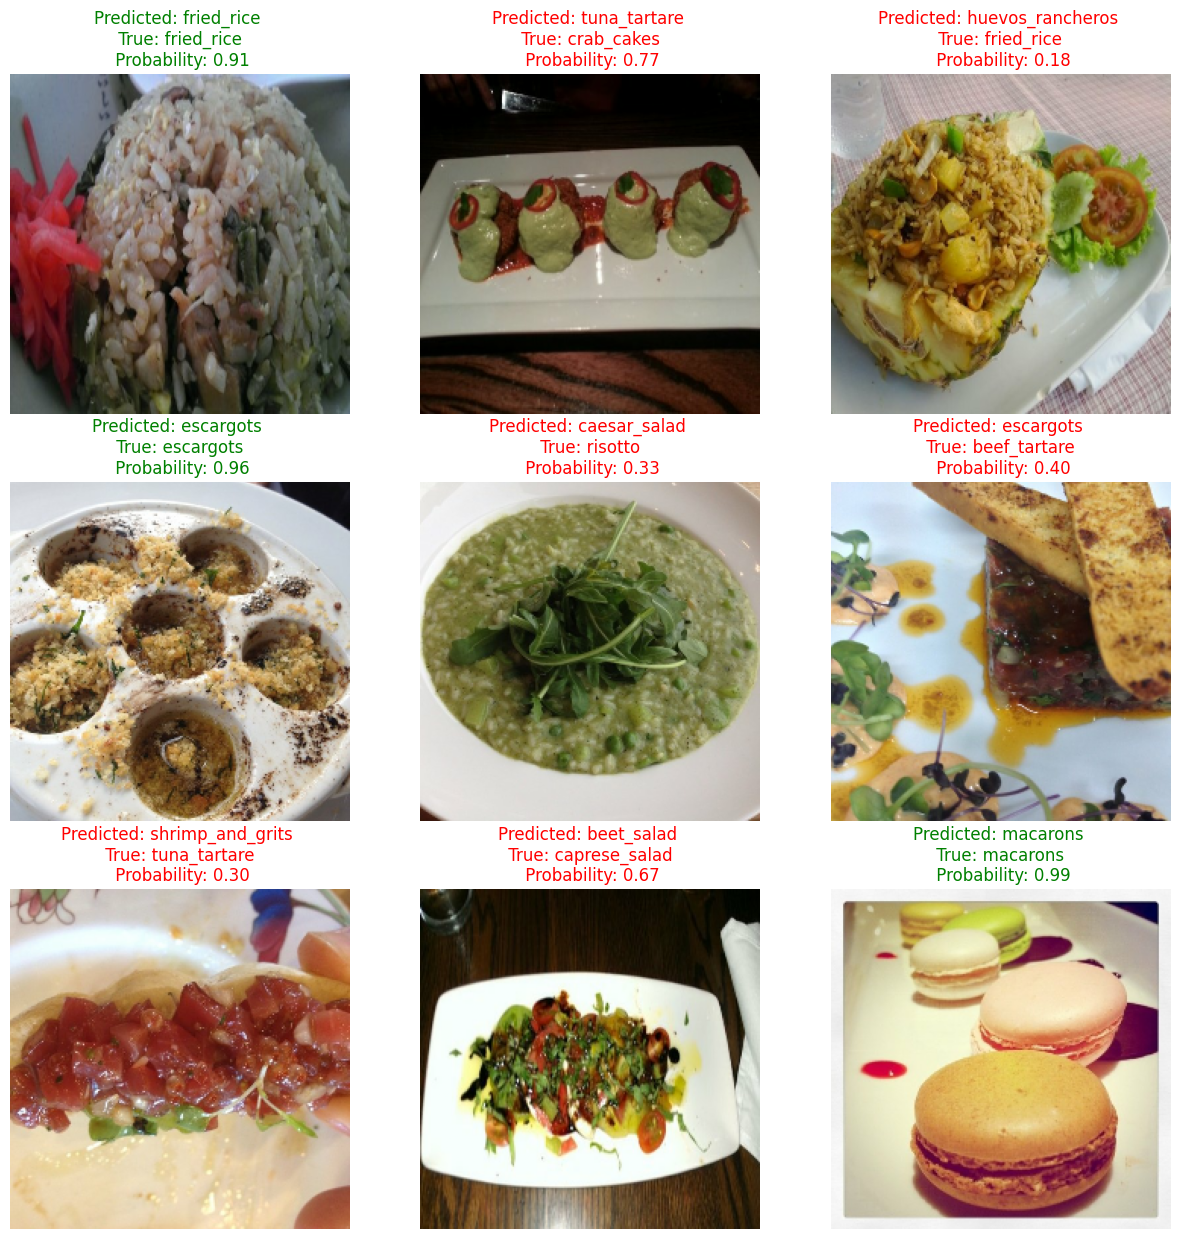

In [49]:
plt.figure(figsize=(15, 15))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  path = '101_food_classes_10_percent/test'
  name = random.choice(os.listdir(path))
  img = os.path.join(path, name, random.choice(os.listdir(os.path.join(path, name))))
  make_prediction(img, name, model)
  i += 1

In [48]:
model.save("Food_Vision_Mini.keras")